# Introducción al Aprendizaje Automático

Empecemos por decir que el aprendizaje automático *(Machine Learning en inglés)*, es una rama de las ciencias computacionales que usan algoritmos para darle a las maquinas *(ósea a las computadoras)* la habilidad de aprender por intermedio de los datos, sin que explícitamente sean programadas para ello *(Aclaremos que esta es una de tantas definiciones que se pueden encontrar en la [web](https://www.google.com/search?q=machine+learning&source=hp&ei=TyeOY7C0CI-bwbkP2OKf6A0&iflsig=AJiK0e8AAAAAY441X5T7-ip8CpKkKrf23oSJoJrX6jvn&ved=0ahUKEwjwl726_eL7AhWPTTABHVjxB90Q4dUDCAg&uact=5&oq=machine+learning&gs_lcp=Cgdnd3Mtd2l6EAMyBQgAEIAEMgUIABCABDIFCAAQgAQyBQguEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEOg4ILhCABBDHARDRAxDUAjoLCC4QgAQQxwEQ0QM6CAguEIAEENQCOgsILhCvARDHARCABDoHCAAQgAQQCjoICC4Q1AIQgAQ6BwguEIAEEApQnARYhRBguBFoAXAAeACAAcoBiAHuDpIBBjAuMTMuMZgBAKABAbABAA&sclient=gws-wiz))*.

En pocas palabras, en este notebook, vamos a tomar un montón *(por montón entiéndase un conjunto)* de datos, y luego emplearemos algunos algoritmos de aprendizaje, tal vez en particular uno *(Algunos de estos algoritmos tienen como su inspiración en modelos probabilísticos y estadísticos de aprendizaje)*, y a esto le aplicaremos algún ejercicio de predicción o clasificación,  y en resume es a lo que le llamaremos Aprendizaje automático.

En pocas palabras, tomaremos un monton de datos, y luego emplearemos algunos algoritmos de aprendizaje *(Vale la pena aclarar que estos algoritmos tienen inspiracion en algunas maquinas provenientes del mundo de la biologia o modelos probabilisticos estadisticos de aprendizaje)*.

## Conceptos básicos

A continuación, es importante que nos familiaricemos con algunos términos antes de continuar con la teoría. Nada teórico formal, es solo una aproximación.

### Aprendizaje Supervisado (Supervised Learning) y No Supervisado (Unsupervisded Learning) 

En un modelo de aprendizaje automático **Supervisado** básicamente nos encargamos de definir las entradas y salidas de este. Es el caso clásico ejercicio en donde por ejemplo queremos clasificar una imagen dada, por ejemplo, tenemos un conjunto de imágenes de diferentes tipos de lindos gatitos, las digitalizamos y las convertimos en vectores, y le ensenamos al modelo que cada uno de estos vectores representa un tipo de gato y luego trataremos de un ingresar una imagen con un gato de una clase de estos y veremos que nuestro modelo podría ser capaz de decirnos si es un gato Mau egipcio o un Chartreux.

Por el otro tenemos el modelo **No Supervisado**, desconocemos las salidas, pero tenemos claro la entrada *(Y con esto nos referimos al conjunto de datos de entrada) *, lo que significa que el algoritmo debe ser capaz de establecer relaciones y/o patrones por nosotros. Dicho de otra forma, el algoritmo es capaz de encontrar un criterio para agrupar entradas similares usando solo la información recibida.


### ¿Clasificación o Regresión?

Podemos decir que por lo general los problemas con los que trataremos principalmente se podrían dividir en dos tipos:

* **Clasificación**: pensemos por un segundo, que podemos decirle a nuestro modelo que la salida es del tipo discreta, es decir $x \in A$, donde $A$ es un conjunto finito *(Digamos el conjunto de gatos de la introducción) *. En este tipo de problemas por lo general definimos las entradas y las salidas, es decir terminaremos con un modelo de aprendizaje supervisado. 

* **Regresión**: para este caso, hablaremos del caso opuesto a clasificación, es decir nuestra salida es una variable continua, tal vez del tipo $x \in \mathbf{R}$, definida sobre algún intervalo. hablemos por ejemplo de la temperatura para el día de mañana, es decir que aquí la mayoría de los problemas obedecen a predicciones numéricas.

## Nuestro primer modelo de aprendizaje automático

La idea ahora es ir paso a paso desarrollando un modelo muy simple de aprendizaje automático. Durante este proceso haremos uso de las librerías de `Pandas` y `Numpy` e introduciremos una nueva que se llama `sklearn`.

Empecemos descargando los datos con los que vamos a trabajar. Para el desarrollo de nuestro modelo vamos a utilizar el clásico dataset de [iris](https://archive-beta.ics.uci.edu/dataset/53/iris):



In [6]:
# Se importar Pandas y se le asigna el alias pd
import pandas as pd

# Se importa los datos del dataset y se convierten en un DataFrame.
df_iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Veamos ahora que tenemos en el conjunto de datos:

In [6]:
df_iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Tenemos 150 observaciones en total, además podemos ver algunas estadísticas relevantes como lo son la media de cada una de las características del iris, y algunos datos por percentiles. Mas allá de eso vemos que nuestra data está muy bien organizada y a primera vista no parece tener ningún valor que vaya a ser un problema. ¿Podemos saber cuántas clases de iris fueron observadas? ¡Claro que sí!

In [5]:
df_iris['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64


Como podemos ver, el método `value_counts()` nos dice que son 3 clases de iris, cada una con respectivamente 50 observaciones.

Pero veámoslo gráficamente:


/home/senorpasajero/anaconda3/envs/DS_for_DD/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

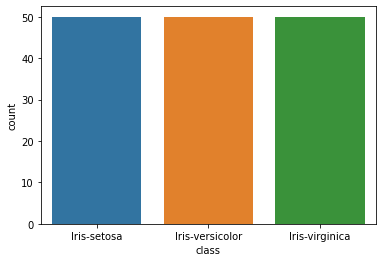

In [7]:
# Se importa la libreria Seaborn y se le asigna el alias sns
import seaborn as sns

# Se visualiza la columna class del DataFrame
sns.countplot(df_iris["class"])

Estamos de suerte, nuestros datos ya se encuentran balanceados, y en buena medida esto es importante en un problema de *clasificación*, pero en la vida real es más realista lidiar con conjuntos de datos que no se encuentran balanceados.

> Si los datos no están balanceados nos llevara a modelos no balanceados que tendrían muy bajo funcionamiento o poder de predicción.


## Correlaciones y algo mas

A continuación, usaremos el poder de la visualización para descubrir si tenemos algún patrón o correlación, en algunas de las características del iris sobre el conjunto de datos:

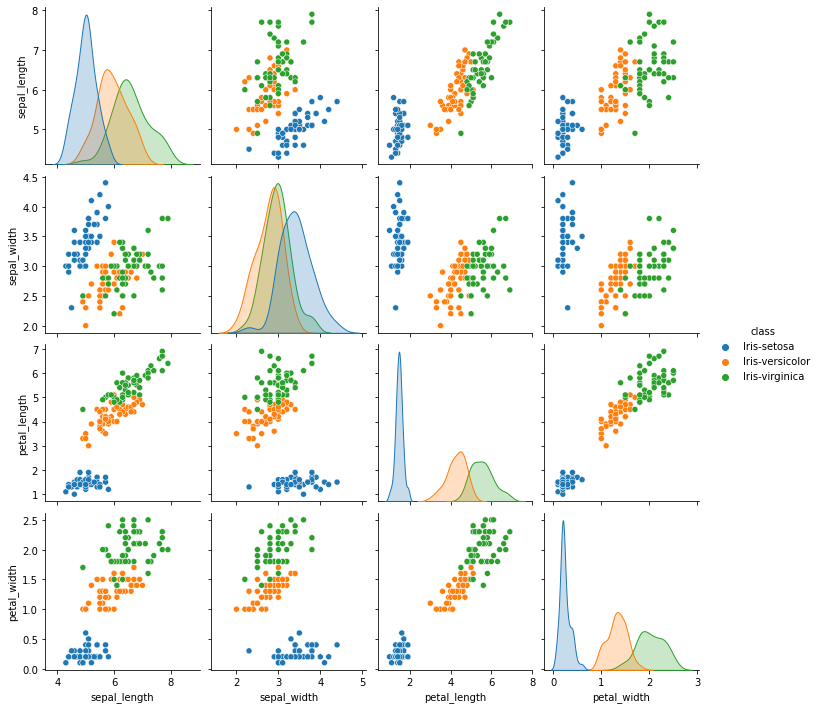

In [15]:
# Se importa Seaborn, y se visualizaon los datos en un pairplot.
import seaborn as sns 
sns.pairplot(df_iris, hue="class")

Analizando un poco las gráficas, podemos ver que la mayoría de las características *(Ancho y largo de pétalo, largo y ancho de sépalo) * siguen una **distribución normal**, lo que significa que la mayoría de las observaciones se localizan al centro de los datos, por medio de esta lectura podríamos pensar cual sería el mejor algoritmo para este problema.

También podemos ver que algunas clases de Iris, y en ciertas características los datos no se sobreponen, lo que nos dice que está bien que usemos la mayoría de las columnas posibles para tratar de evitar algún dato mentiroso.


# Identificacion de Mentirosos

### Aqui se trata de eliminar los outliers, siguiendo el modelo de acotacion por arriba y por abajo para las caracteristicas que aplican

<AxesSubplot:xlabel='class', ylabel='sepal_width'>

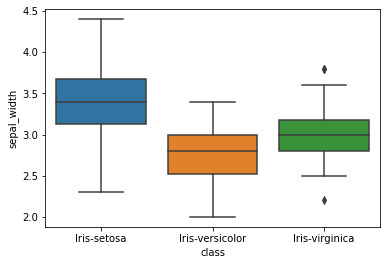

In [17]:
sns.boxplot(x='class', y='sepal_width', data=df_iris)

In [32]:
df_iris_setosa = df_iris[df_iris["class"] =="Iris-setosa"]
Q1 = df_iris_setosa["sepal_length"].quantile(0.25)
Q3 = df_iris_setosa["sepal_length"].quantile(0.85)

IQR = Q3 - Q1
IQR


df_iris = df_iris.query('(@Q1 - 1.5 * @IQR) <= sepal_length <= (@Q3 + 1.5 * @IQR)')
df_iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
138,6.0,3.0,4.8,1.8,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Y ahora el siguiente paso es sobre las correlaciones que pueden existir entre las características y para ello haremos uso del **mapa de calor**, *por su nombre en inglés Heat Map*:

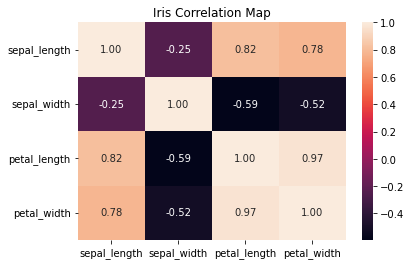

In [54]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots()

sns.heatmap(df_iris.corr(), annot=True, fmt=".2f", ax=axis)

plt.title('Iris Correlation Map')
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
plt.show()

Si algunas de las columnas presentasen una alta correlación entre ellas, donde estas columnas representan las características independientes *(largo y ancho del pétalo o el largo y ancho del sépalo) *, a este se le conoce por su nombre de **Correlación Múltiple**, y desde un punto de vista estadístico inferencial esto podría llevarnos a resultados no confiables.

**La solución a esto puede ser tan sencilla como eliminar las columnas**, trata de eliminar las columnas cuya correlación equivale a $0.9$, para nuestra suerte no es algo que pase en nuestro conjunto de datos (¡Obviaremos esto en este ejercicio, sigamos!).


## Ahora creemos el modelo

Digamos que los datos están listos, lo primero que debemos hacer es identificar quien es $X$ *(propiedades)* y quien es $y$ *(categoría)*:

In [9]:
# Se excluye la columna clase, dado que es más una categoría
X = df_iris.drop(columns=['class'])

# Se toman solo las posibles categorías de iris
y = df_iris["class"].values

Ahora dada que las magnitudes de las propiedades o características pueden variar por clase, es decir son un poco diferentes y dado que esto puede afectar la predicción, es necesario que los datos sean normalizado *(a veces se hace referencia a esto como el escalado)*:

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

,sepal_length,sepal_width,petal_length,petal_width
0,-0.626679,0.922230,-1.067497,-1.044763
1,-0.993515,-0.113122,-1.067497,-1.044763
2,-1.360352,0.301019,-1.130982,-1.044763
3,-1.543770,0.093949,-1.004011,-1.044763
4,-0.810097,1.129300,-1.067497,-1.044763
...,...,...,...,...
103,1.024085,-0.113122,1.091010,1.293774
104,0.657249,-0.734333,1.281466,1.439932
105,1.574340,-1.148473,1.217981,1.439932
106,1.390921,0.715159,1.471923,2.024567


## Datos de Entrenamiento y de Pruebas

Ahora podemos decir que nuestras propiedades están **normalizadas**, el siguiente paso es dividir los datos en dos conjuntos, el de prueba y el de entrenamiento:


> Overfitting y Underfitting: Uno de los objetivos más importantes a la hora de crear un modelo de aprendizaje automático, es que este balanceado, tengamos en cuenta que balanceado también hace referencia a que el modelo tiene un funcionamiento optimo en relación con nuestras variables de interés.


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=40)
X_test

,sepal_length,sepal_width,petal_length,petal_width
15,0.473830,2.785862,-1.004011,-0.752446
63,0.290412,-1.148473,0.519641,0.270664
17,-0.626679,0.922230,-1.067497,-0.898604
93,0.473830,-1.148473,1.217981,1.586091
2,-1.360352,0.301019,-1.130982,-1.044763
78,0.106994,-1.148473,0.583126,0.562981
103,1.024085,-0.113122,1.091010,1.293774
39,-0.626679,0.715159,-1.004011,-1.044763
4,-0.810097,1.129300,-1.067497,-1.044763
84,0.473830,-0.113122,0.710097,0.416823


LLego el momento de la verdad y de entrenar al modelo de **Gaussian Naive Bayes Classifier**, recordemos que este es un algoritmo supervisado que se basa en el teorema de Bayes. No vamos a hablar mucho sobre el algoritmo ya que no es el proposito del notebook.

Empezemos con la implementacion:

In [12]:
# Se importan las librerias de RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Se crean los conjuntos de pruebas y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=100)

# Se crea la instancia del modelo de clasificacion Random Forest, el algoritmo de Random Forest usa
# arboles de decision, en este caso vamos a utilizar un 100 de estos.
forest = RandomForestClassifier(n_estimators=100, random_state=100)

Ahora, el siguiente paso es ajustar el modelo y generar predicciones:

In [15]:
# Se ajusta (fit) el modelo
forest.fit(X_train, y_train)

# Se generan las predicciones con el conjunto de pruebas
predictions = forest.predict(X_test)

# Se verifica la precision del modelo generado
accuracy_score(y_test, predictions)

0.9111111111111111

Y eso es basicamente todo, nuestro modelo generado tiuene una precision del **91%**, lo cual no es malo del todo, de hecho para ser nuestra primera vez suena bastante prometedor.

### Otras métricas de evaluación 
Podemos evaluar el modelo previamente generado, con la revisión de otros indicadores como lo son la **precisión**, **el recuerdo** y la **puntuación F1**, generados por medio del método `classification_report()` para ello:


In [17]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.79      0.88        19
 Iris-virginica       0.73      1.00      0.85        11

       accuracy                           0.91        45
      macro avg       0.91      0.93      0.91        45
   weighted avg       0.93      0.91      0.91        45

